In [58]:
# Torch Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

# Numpy Imports
import numpy as np

# Sklearn Imports
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Matplotlib Imports
from matplotlib import pyplot as plt

# Feature Engineering Import
%run "../Feature Engineering/azwad.ipynb"

In [59]:
# Setting up the Tensors for the model
features, labels = featureEngineering("../Datasets/spam.csv")
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=42)
x_train = torch.Tensor(torch.from_numpy(x_train.values.astype(np.float32)))
x_test = torch.Tensor(torch.from_numpy(x_test.values.astype(np.float32)))
y_train = torch.Tensor(torch.from_numpy(y_train.values.astype(np.float32))).reshape(-1,1)
y_test = torch.Tensor(torch.from_numpy(y_test.values.astype(np.float32))).reshape(-1,1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 1]               2
           Sigmoid-2                 [-1, 1, 1]               0
Total params: 2
Trainable params: 2
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
Final loss: train: 13.494211196899414, test: 12.952609062194824
Train Accuracy: 0.8646153846153846, Test Accuracy: 0.8690191387559809


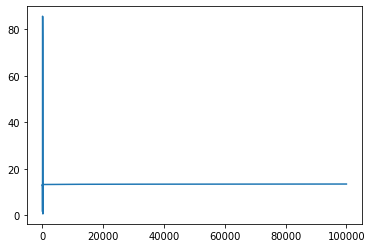

In [60]:
class TorchLogisticRegression(torch.nn.Module):
    def __init__(self, input_dimensions):
        super(TorchLogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dimensions, 1)
        self.output = torch.nn.Sigmoid()

    def forward(self, x):
        output = self.output(self.linear(x))
        return output

lgr = TorchLogisticRegression(1)
summary(lgr, (1, 1)) 
loss_function = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(lgr.parameters(), lr=1e-1)

errors = []
for epoch in range(100000):  
    optimizer.zero_grad()
    outputs = lgr(x_train)
    loss = loss_function(outputs, y_train)
    errors.append(loss.item())
    loss.backward(retain_graph=True)
    optimizer.step()
plt.plot(errors)

y_predicted_train = lgr(x_train)
y_predicted_test = lgr(x_test)
final_loss_train = loss_function(y_predicted_train, y_train)
final_loss_test = loss_function(y_predicted_test, y_test)
print(f"Final loss: train: {final_loss_train}, test: {final_loss_test}")

y_predicted_train_classes = (y_predicted_train.detach().numpy() > 0.5).astype(float)
y_predicted_test_classes = (y_predicted_test.detach().numpy() > 0.5).astype(float)
train_accuracy = metrics.accuracy_score(y_train, y_predicted_train_classes)
test_accuracy = metrics.accuracy_score(y_test, y_predicted_test_classes)
print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]              40
            Linear-2                    [-1, 1]              21
Total params: 61
Trainable params: 61
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
Final loss: train: 13.538461685180664, test: 13.0980863571167
Train Accuracy: 0.8646153846153846, Test Accuracy: 0.8690191387559809


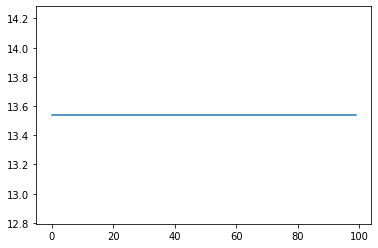

In [61]:
class SimpleNeuralNet(nn.Module):
    def __init__(self, hidden_units):
        super().__init__()
        self.linear = nn.Linear(1, hidden_units)
        self.output_layer = nn.Linear(hidden_units, 1)

    def forward(self, x):
        x = x.view(-1, 1)
        z1 = self.linear(x)
        a1 = F.relu(z1)
        z2 = self.output_layer(a1)
        return F.log_softmax(z2, dim=1)

nn_model = SimpleNeuralNet(20)
summary(nn_model, (1, 1, 1))
loss_function = torch.nn.BCELoss() 
optimizer = torch.optim.SGD(nn_model.parameters(), lr=1e-1)

errors = []
for epoch in range(100):  
    optimizer.zero_grad()
    outputs = nn_model(x_train)
    loss = loss_function(outputs, y_train)
    errors.append(loss.item())
    loss.backward(retain_graph=True)
    optimizer.step()
plt.plot(errors)

y_predicted_train = nn_model(x_train)
y_predicted_test = nn_model(x_test)
final_loss_train = loss_function(y_predicted_train, y_train)
final_loss_test = loss_function(y_predicted_test, y_test)
print(f"Final loss: train: {final_loss_train}, test: {final_loss_test}")

y_predicted_train_classes = (y_predicted_train.detach().numpy())
y_predicted_test_classes = (y_predicted_test.detach().numpy())
train_accuracy = metrics.accuracy_score(y_train, y_predicted_train_classes)
test_accuracy = metrics.accuracy_score(y_test, y_predicted_test_classes)
print(f"Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")